# Exploration of `Where we Move` Game

in this notebook, I am going to read, clean and plot the initial charts for the game sessions being held on IHE Delft and Municipality. the further steps are being explained in next steps.

#### 1- reading and take an overview to the data collected

importing the liberaries

In [1]:
%matplotlib inline

import pandas as pd
import os 
import palettable as pl
import seaborn as sns
from seaborn import palplot
import matplotlib.pyplot as plt

reading the csv data (firstly exported from SPSS to csv format)
important; to be easy for third person reviewing my model, she would be accessible to the codes below, if she can upload the attached files to this model (eg. csv file) via her own device or pc. I am using the dynamic path, so you can open and start running this model, just when you coppied the csv, next to your python file location.

In [2]:
#write down your file location in formatted below (be careful of backslash instead of dashes)

#path = 'D:\WaterEng\TUDelft\EPACourses\9- Capita Selecta (Where do we move)\week 6'


converting the xlsx to csv

In [3]:
game = pd.read_excel('Game data.xlsx')

game.to_csv('Game data.csv', index=False)

In [4]:
game = pd.read_csv('Game data.csv')

game

,PlayerID,Round,Question1,Question2,Membership,GameTactic,Income,LivingCost,MaxMortgage,StartingSavings,...,Riverfloodlag,RainFloodlag,GreenGarden_Lead,Automatic_Lead,Waterpump_Lead,Bulkhead_Lead,RiseGround_Lead,Waterproof_Lead,Sandbag_Lead,Rainbarrel_Lead
0,1,1,3.0,NaN,1,4.0,180,105,300,80,...,NaN,NaN,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
1,1,2,1.0,3.0,1,NaN,180,105,300,80,...,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0
2,2,1,5.0,NaN,2,2.0,120,65,200,50,...,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
3,2,2,2.0,3.0,2,2.0,120,65,200,50,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0
4,2,3,3.0,2.0,2,2.0,120,65,200,50,...,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,53,1,3.0,3.0,1,2.0,80,40,130,15,...,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
216,53,2,3.0,1.0,1,2.0,80,40,130,15,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
217,53,3,3.0,2.0,1,2.0,80,40,130,15,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
218,53,4,2.0,2.0,1,2.0,80,40,130,15,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0


the data is consists of `53 individual` players, played the game for at least 3 to 5 rounds. data collected from IHE delft UNESCO institute for water education and municipality staffs.

In [5]:
game.dtypes

PlayerID                      int64
Round                         int64
Question1                   float64
Question2                   float64
Membership                    int64
GameTactic                  float64
Income                        int64
LivingCost                    int64
MaxMortgage                   int64
StartingSavings               int64
IncreaseSatisfaction          int64
PreferredHouseRating          int64
ActualHouseRating             int64
Savings                     float64
BeginSatisfaction             int64
EndSatisfaction             float64
Damage                        int64
SpendableIncome             float64
PayingDebt                  float64
PayingSatisfaction          float64
PayingMeasures              float64
RiverFloodedArea            float64
RiverFloodedHouse           float64
RainFloodedArea             float64
RainFloodedHouse            float64
Address                      object
GreenGarden                 float64
AutomaticSteelWalls         

Here there are several columns with NAN values inside. while I have already checked them through SPSS, `they used to be 0 values` in SPSS sheet, but now while exported to csv, is being shown as `NAN`.

lets jump into an new step tho.

#### 2- cleaning the data typed properly to further operation

the `best way` to tackle such data is to `convert them to 0 values`, since numbers are sth doable within pandas, but NANs are not!

so here, I am trying to convert NANs ro 0 values.

In [6]:
columns_to_fill = ['Address','Question1', 'Question2', 'GameTactic','Savings','EndSatisfaction','SpendableIncome','PayingDebt','PayingSatisfaction','PayingMeasures','RiverFloodedArea','RiverFloodedHouse','RainFloodedArea','RainFloodedHouse','GreenGarden','AutomaticSteelWalls','Waterpump','Bulkhead','RiseGroundLevel','WaterproofWallsandFloors','Sandbags','Rainbarrel','Riverfloodlag','RainFloodlag','GreenGarden_Lead','Automatic_Lead','Waterpump_Lead','Bulkhead_Lead','RiseGround_Lead','Waterproof_Lead','Sandbag_Lead','Rainbarrel_Lead'] 

game[columns_to_fill] = game[columns_to_fill].fillna(0)

In [7]:
game.head()

,PlayerID,Round,Question1,Question2,Membership,GameTactic,Income,LivingCost,MaxMortgage,StartingSavings,...,Riverfloodlag,RainFloodlag,GreenGarden_Lead,Automatic_Lead,Waterpump_Lead,Bulkhead_Lead,RiseGround_Lead,Waterproof_Lead,Sandbag_Lead,Rainbarrel_Lead
0,1,1,3.0,0.0,1,4.0,180,105,300,80,...,0.0,0.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
1,1,2,1.0,3.0,1,0.0,180,105,300,80,...,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0
2,2,1,5.0,0.0,2,2.0,120,65,200,50,...,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
3,2,2,2.0,3.0,2,2.0,120,65,200,50,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0
4,2,3,3.0,2.0,2,2.0,120,65,200,50,...,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0


In [8]:
game.dtypes

PlayerID                      int64
Round                         int64
Question1                   float64
Question2                   float64
Membership                    int64
GameTactic                  float64
Income                        int64
LivingCost                    int64
MaxMortgage                   int64
StartingSavings               int64
IncreaseSatisfaction          int64
PreferredHouseRating          int64
ActualHouseRating             int64
Savings                     float64
BeginSatisfaction             int64
EndSatisfaction             float64
Damage                        int64
SpendableIncome             float64
PayingDebt                  float64
PayingSatisfaction          float64
PayingMeasures              float64
RiverFloodedArea            float64
RiverFloodedHouse           float64
RainFloodedArea             float64
RainFloodedHouse            float64
Address                      object
GreenGarden                 float64
AutomaticSteelWalls         

In [9]:
columns_to_convert = ['Question1', 'Question2', 'GameTactic','Savings','EndSatisfaction','SpendableIncome','PayingDebt','PayingSatisfaction','PayingMeasures','RiverFloodedArea','RiverFloodedHouse','RainFloodedArea','RainFloodedHouse','GreenGarden','AutomaticSteelWalls','Waterpump','Bulkhead','RiseGroundLevel','WaterproofWallsandFloors','Sandbags','Rainbarrel','Riverfloodlag','RainFloodlag','GreenGarden_Lead','Automatic_Lead','Waterpump_Lead','Bulkhead_Lead','RiseGround_Lead','Waterproof_Lead','Sandbag_Lead','Rainbarrel_Lead'] 

game[columns_to_convert] = game[columns_to_convert].astype(int)

In [10]:
game.dtypes

PlayerID                     int64
Round                        int64
Question1                    int32
Question2                    int32
Membership                   int64
GameTactic                   int32
Income                       int64
LivingCost                   int64
MaxMortgage                  int64
StartingSavings              int64
IncreaseSatisfaction         int64
PreferredHouseRating         int64
ActualHouseRating            int64
Savings                      int32
BeginSatisfaction            int64
EndSatisfaction              int32
Damage                       int64
SpendableIncome              int32
PayingDebt                   int32
PayingSatisfaction           int32
PayingMeasures               int32
RiverFloodedArea             int32
RiverFloodedHouse            int32
RainFloodedArea              int32
RainFloodedHouse             int32
Address                     object
GreenGarden                  int32
AutomaticSteelWalls          int32
Waterpump           

and the type of elements in dataframe are not integer, which later makes mistakes for claculation. first I need them to be integer type

In [11]:
game.dtypes

PlayerID                     int64
Round                        int64
Question1                    int32
Question2                    int32
Membership                   int64
GameTactic                   int32
Income                       int64
LivingCost                   int64
MaxMortgage                  int64
StartingSavings              int64
IncreaseSatisfaction         int64
PreferredHouseRating         int64
ActualHouseRating            int64
Savings                      int32
BeginSatisfaction            int64
EndSatisfaction              int32
Damage                       int64
SpendableIncome              int32
PayingDebt                   int32
PayingSatisfaction           int32
PayingMeasures               int32
RiverFloodedArea             int32
RiverFloodedHouse            int32
RainFloodedArea              int32
RainFloodedHouse             int32
Address                     object
GreenGarden                  int32
AutomaticSteelWalls          int32
Waterpump           

datatypes are now mostly in integer format. which is convinient for calculation and functions.

What now is required, is to filter dataframe based on implemented private measures;

In [12]:
game.head()

,PlayerID,Round,Question1,Question2,Membership,GameTactic,Income,LivingCost,MaxMortgage,StartingSavings,...,Riverfloodlag,RainFloodlag,GreenGarden_Lead,Automatic_Lead,Waterpump_Lead,Bulkhead_Lead,RiseGround_Lead,Waterproof_Lead,Sandbag_Lead,Rainbarrel_Lead
0,1,1,3,0,1,4,180,105,300,80,...,0,0,1,2,2,2,2,2,2,2
1,1,2,1,3,1,0,180,105,300,80,...,2,2,2,2,2,2,1,2,2,2
2,2,1,5,0,2,2,120,65,200,50,...,2,2,1,2,2,2,2,2,2,2
3,2,2,2,3,2,2,120,65,200,50,...,2,2,2,2,2,2,2,2,2,1
4,2,3,3,2,2,2,120,65,200,50,...,2,1,2,2,2,2,2,2,2,2


In [13]:
private_measures = game[['Game','PlayerID','Round','GreenGarden', 'AutomaticSteelWalls', 'Waterpump','Bulkhead','RiseGroundLevel','WaterproofWallsandFloors','Sandbags','Rainbarrel']]
private_measures = private_measures.sort_values(by='PlayerID', ascending=True)
private_measures

,Game,PlayerID,Round,GreenGarden,AutomaticSteelWalls,Waterpump,Bulkhead,RiseGroundLevel,WaterproofWallsandFloors,Sandbags,Rainbarrel
0,1,1,1,2,2,2,2,1,2,2,2
1,1,1,2,1,2,2,2,2,2,2,2
2,1,2,1,2,2,2,2,1,2,2,2
3,1,2,2,1,2,2,2,2,2,2,2
4,1,2,3,2,2,2,2,2,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...
218,7,53,4,2,2,2,2,2,2,2,2
215,7,53,1,2,2,2,2,2,2,2,2
216,7,53,2,2,2,2,2,2,2,2,2
217,7,53,3,2,2,2,2,2,2,2,2


I realised in data collected from SPSS, (filled out previously by Jarno) that there are implemented private measures by players and are indicated by numbers(1). the rest of numbers are  (2) which doesn't make sense to further analysis. those are literally means that there was no implemented measure. lets exchange numbers 2 with 0

In [14]:
#selecting only the columns which are private measures
columns_to_replace = ['GreenGarden', 'AutomaticSteelWalls', 'Waterpump','Bulkhead','RiseGroundLevel','WaterproofWallsandFloors','Sandbags','Rainbarrel']

# Replace 2 with 0 only in the specified columns
private_measures[columns_to_replace] = private_measures[columns_to_replace].replace(2, 0)
private_measures

,Game,PlayerID,Round,GreenGarden,AutomaticSteelWalls,Waterpump,Bulkhead,RiseGroundLevel,WaterproofWallsandFloors,Sandbags,Rainbarrel
0,1,1,1,0,0,0,0,1,0,0,0
1,1,1,2,1,0,0,0,0,0,0,0
2,1,2,1,0,0,0,0,1,0,0,0
3,1,2,2,1,0,0,0,0,0,0,0
4,1,2,3,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
218,7,53,4,0,0,0,0,0,0,0,0
215,7,53,1,0,0,0,0,0,0,0,0
216,7,53,2,0,0,0,0,0,0,0,0
217,7,53,3,0,0,0,0,0,0,0,0


the data frame is now prepared to operate sum function. we need it later

### 3- analysing the data

I want to see an overall overview of the implemented private measures by players. thats only a summation of columns `(applied measure)`

In [15]:
column_sums = private_measures[columns_to_replace].sum()
column_sums

GreenGarden                 23
AutomaticSteelWalls         10
Waterpump                   12
Bulkhead                    19
RiseGroundLevel             18
WaterproofWallsandFloors     9
Sandbags                    25
Rainbarrel                  17
dtype: int64

the data matched with table 12 of thesis outcome! here is the table from thesis;


In [16]:
pip install Pillow

Note: you may need to restart the kernel to use updated packages.


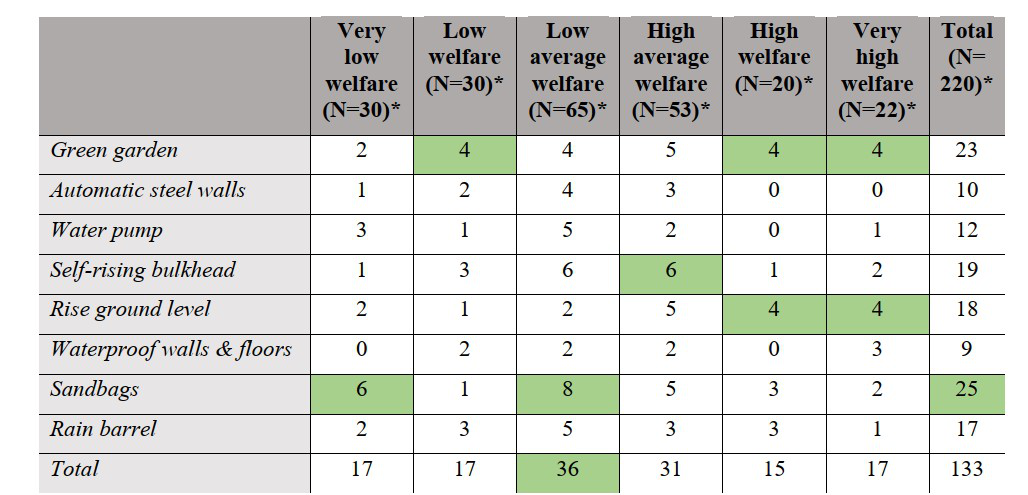

In [17]:
from PIL import Image
from IPython.display import display

image_path = 'D:/TUDelft/EPACourses/9- Capita Selecta (Where do we move)/Week 7/Table12.jpg'  
image = Image.open(image_path)
display(image)

From reading the thesis, I realized that there are 7 tables which these data has been gained from. And the total number of players are 53. So approximately there are 8 players per table. 
Now for carrying out the data analytic of implemented private flood measures, I need the table rounds indicator in the data sheet. This is clearly shown in `Game column`. Now trying to sort upon different rounds played, by every each player.


the below data frame is all data with 
## `table 1`

In [18]:
filtered_game1 = private_measures[private_measures['Game'] == 1]
filtered_game1.head()

,Game,PlayerID,Round,GreenGarden,AutomaticSteelWalls,Waterpump,Bulkhead,RiseGroundLevel,WaterproofWallsandFloors,Sandbags,Rainbarrel
0,1,1,1,0,0,0,0,1,0,0,0
1,1,1,2,1,0,0,0,0,0,0,0
2,1,2,1,0,0,0,0,1,0,0,0
3,1,2,2,1,0,0,0,0,0,0,0
4,1,2,3,0,0,0,0,0,0,0,1


In [19]:
#make the pallet more fruity!
cmap_tables = sns.cubehelix_palette(as_cmap=True)

cmap_overall_chart = sns.color_palette("viridis", as_cmap=True)


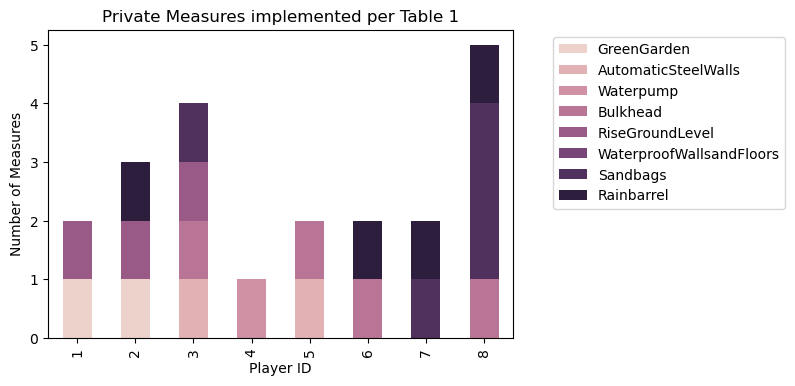

In [20]:
grouped_game1 = filtered_game1.groupby('PlayerID')[columns_to_replace].sum()

# Plotting the horizontal bar chart
grouped_game1.plot(kind='bar', stacked=True, figsize=(6, 4), cmap=cmap_tables)

plt.title('Private Measures implemented per Table 1')
plt.ylabel('Number of Measures')
plt.xlabel('Player ID')
plt.legend(loc='upper right', bbox_to_anchor=(1.6,1))  
plt.show()

the below data frame is all data with 
### `table 2`

In [21]:
filtered_game2 = private_measures[private_measures['Game'] == 2]
filtered_game2.head()

,Game,PlayerID,Round,GreenGarden,AutomaticSteelWalls,Waterpump,Bulkhead,RiseGroundLevel,WaterproofWallsandFloors,Sandbags,Rainbarrel
38,2,9,2,0,0,0,0,0,0,0,0
39,2,9,3,0,0,0,1,0,0,0,0
37,2,9,1,1,0,0,0,0,0,0,0
40,2,10,1,1,0,0,0,1,0,0,0
41,2,10,2,0,0,0,0,0,0,0,1


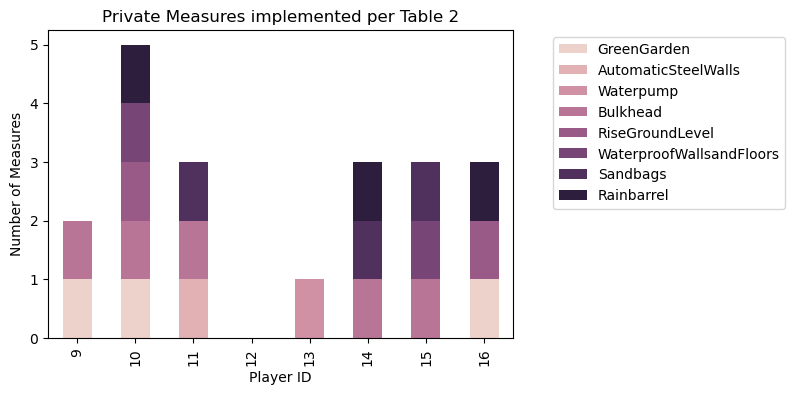

In [22]:
grouped_game2 = filtered_game2.groupby('PlayerID')[columns_to_replace].sum()

# Plotting the horizontal bar chart
grouped_game2.plot(kind='bar', stacked=True, figsize=(6, 4), cmap=cmap_tables)
plt.title('Private Measures implemented per Table 2')
plt.ylabel('Number of Measures')
plt.xlabel('Player ID')
plt.legend(loc='upper right', bbox_to_anchor=(1.6,1))  
plt.show()

the below data frame is all data with 
### `table 3`

In [23]:
filtered_game3 = private_measures[private_measures['Game'] == 3]
filtered_game3.head()

,Game,PlayerID,Round,GreenGarden,AutomaticSteelWalls,Waterpump,Bulkhead,RiseGroundLevel,WaterproofWallsandFloors,Sandbags,Rainbarrel
59,3,17,1,0,0,1,0,0,1,1,0
60,3,17,2,0,0,0,0,0,0,0,0
61,3,18,1,0,0,0,0,1,0,0,0
62,3,18,2,0,0,0,0,0,0,0,0
63,3,19,1,0,0,0,0,0,0,0,0


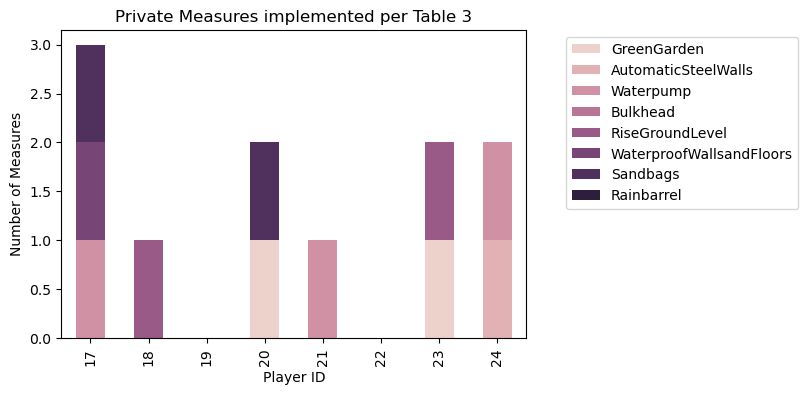

In [24]:
grouped_game3 = filtered_game3.groupby('PlayerID')[columns_to_replace].sum()

# Plotting the horizontal bar chart
grouped_game3.plot(kind='bar', stacked=True, figsize=(6, 4), cmap=cmap_tables)
plt.title('Private Measures implemented per Table 3')
plt.ylabel('Number of Measures')
plt.xlabel('Player ID')
plt.legend(loc='upper right', bbox_to_anchor=(1.6,1))  
plt.show()

the below data frame is all data with 
### `table 4`

In [25]:
filtered_game4 = private_measures[private_measures['Game'] == 4]
filtered_game4.head()

,Game,PlayerID,Round,GreenGarden,AutomaticSteelWalls,Waterpump,Bulkhead,RiseGroundLevel,WaterproofWallsandFloors,Sandbags,Rainbarrel
78,4,25,4,1,0,0,0,1,0,0,1
77,4,25,3,1,0,0,0,0,0,0,0
79,4,25,5,0,0,0,0,0,0,0,0
75,4,25,1,0,0,0,0,0,0,0,1
76,4,25,2,0,0,0,0,0,0,0,0


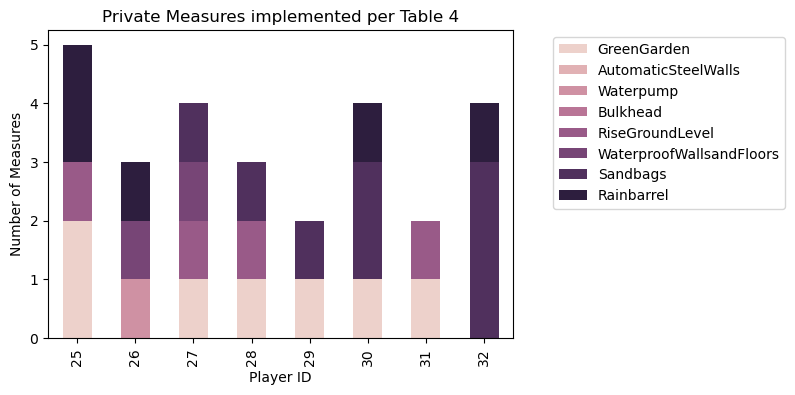

In [26]:
grouped_game4 = filtered_game4.groupby('PlayerID')[columns_to_replace].sum()

# Plotting the horizontal bar chart
grouped_game4.plot(kind='bar', stacked=True, figsize=(6, 4), cmap=cmap_tables)
plt.title('Private Measures implemented per Table 4')
plt.ylabel('Number of Measures')
plt.xlabel('Player ID')
plt.legend(loc='upper right', bbox_to_anchor=(1.6,1))  
plt.show()

the below data frame is all data with 
### `table 5`

In [27]:
filtered_game5 = private_measures[private_measures['Game'] == 5]
filtered_game5.head()

,Game,PlayerID,Round,GreenGarden,AutomaticSteelWalls,Waterpump,Bulkhead,RiseGroundLevel,WaterproofWallsandFloors,Sandbags,Rainbarrel
118,5,33,4,1,0,0,0,1,0,0,0
117,5,33,3,0,0,1,0,0,0,0,0
119,5,33,5,0,0,0,0,0,0,0,0
115,5,33,1,0,0,0,0,0,0,1,0
116,5,33,2,0,0,0,0,0,0,0,0


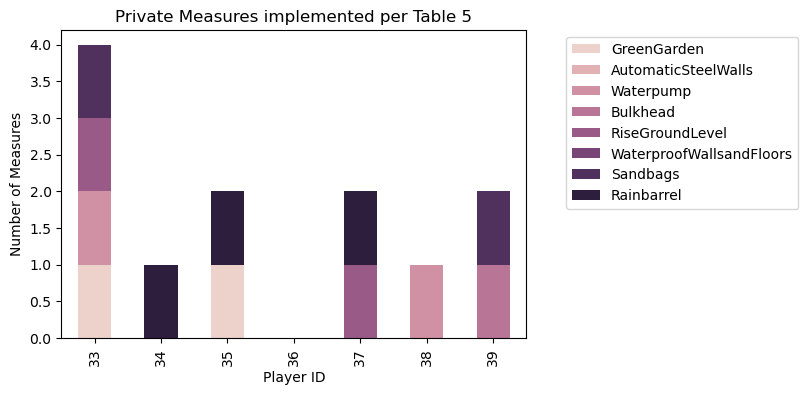

In [28]:
grouped_game5 = filtered_game5.groupby('PlayerID')[columns_to_replace].sum()

# Plotting the horizontal bar chart
grouped_game5.plot(kind='bar', stacked=True, figsize=(6, 4), cmap=cmap_tables)
plt.title('Private Measures implemented per Table 5')
plt.ylabel('Number of Measures')
plt.xlabel('Player ID')
plt.legend(loc='upper right', bbox_to_anchor=(1.6,1))  
plt.show()

the below data frame is all data with 
### `table 6`

In [29]:
filtered_game6 = private_measures[private_measures['Game'] == 6]
filtered_game6.head()

,Game,PlayerID,Round,GreenGarden,AutomaticSteelWalls,Waterpump,Bulkhead,RiseGroundLevel,WaterproofWallsandFloors,Sandbags,Rainbarrel
150,6,40,1,0,1,0,0,0,0,0,0
151,6,40,2,0,0,1,1,0,0,0,0
152,6,40,3,0,0,0,0,0,0,1,0
153,6,40,4,0,0,0,0,0,0,0,0
154,6,40,5,0,0,0,0,1,1,0,0


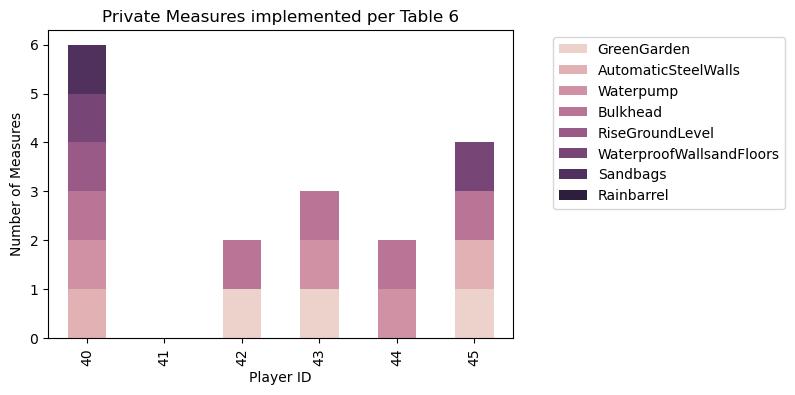

In [30]:
grouped_game6 = filtered_game6.groupby('PlayerID')[columns_to_replace].sum()

# Plotting the horizontal bar chart
grouped_game6.plot(kind='bar', stacked=True, figsize=(6, 4), cmap=cmap_tables)
plt.title('Private Measures implemented per Table 6')
plt.ylabel('Number of Measures')
plt.xlabel('Player ID')
plt.legend(loc='upper right', bbox_to_anchor=(1.6,1))  
plt.show()

the below data frame is all data with 
### `table 7`

In [31]:
filtered_game7 = private_measures[private_measures['Game'] == 7]
filtered_game7.head()

,Game,PlayerID,Round,GreenGarden,AutomaticSteelWalls,Waterpump,Bulkhead,RiseGroundLevel,WaterproofWallsandFloors,Sandbags,Rainbarrel
180,7,46,1,0,0,0,0,0,0,1,0
181,7,46,2,0,0,0,0,0,0,0,1
182,7,46,3,1,0,0,0,0,0,0,0
183,7,46,4,0,0,0,1,0,0,1,0
184,7,46,5,0,0,0,0,0,0,0,0


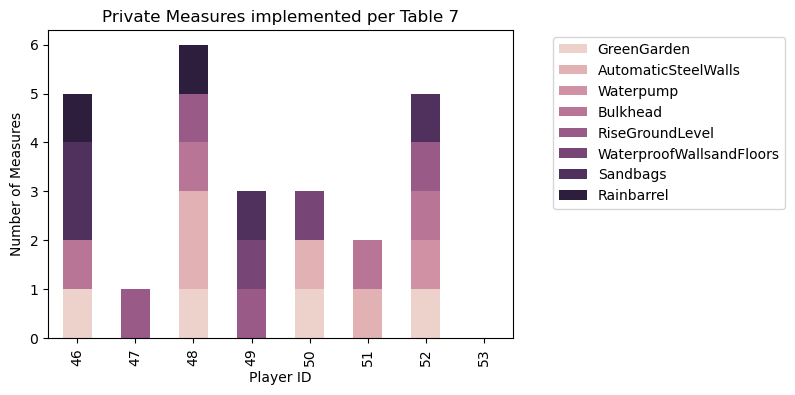

In [32]:
grouped_game7 = filtered_game7.groupby('PlayerID')[columns_to_replace].sum()

# Plotting the horizontal bar chart
grouped_game7.plot(kind='bar', stacked=True, figsize=(6, 4), cmap=cmap_tables)
plt.title('Private Measures implemented per Table 7')
plt.ylabel('Number of Measures')
plt.xlabel('Player ID')
plt.legend(loc='upper right', bbox_to_anchor=(1.6,1))  
plt.show()

below, Im proposing to have the whole players in a single plot
### `all players`


In [33]:
private_measures_overall = private_measures[['Game','PlayerID','Round','GreenGarden', 'AutomaticSteelWalls', 'Waterpump','Bulkhead','RiseGroundLevel','WaterproofWallsandFloors','Sandbags','Rainbarrel']]
private_measures_overall = private_measures.sort_values(by='Round', ascending=True)
private_measures_overall

,Game,PlayerID,Round,GreenGarden,AutomaticSteelWalls,Waterpump,Bulkhead,RiseGroundLevel,WaterproofWallsandFloors,Sandbags,Rainbarrel
0,1,1,1,0,0,0,0,1,0,0,0
145,5,39,1,0,0,0,0,0,0,1,0
75,4,25,1,0,0,0,0,0,0,0,1
40,2,10,1,1,0,0,0,1,0,0,0
140,5,38,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
134,5,36,5,0,0,0,0,0,0,0,0
189,7,47,5,0,0,0,0,0,0,0,0
194,7,48,5,0,1,0,1,0,0,0,0
119,5,33,5,0,0,0,0,0,0,0,0


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

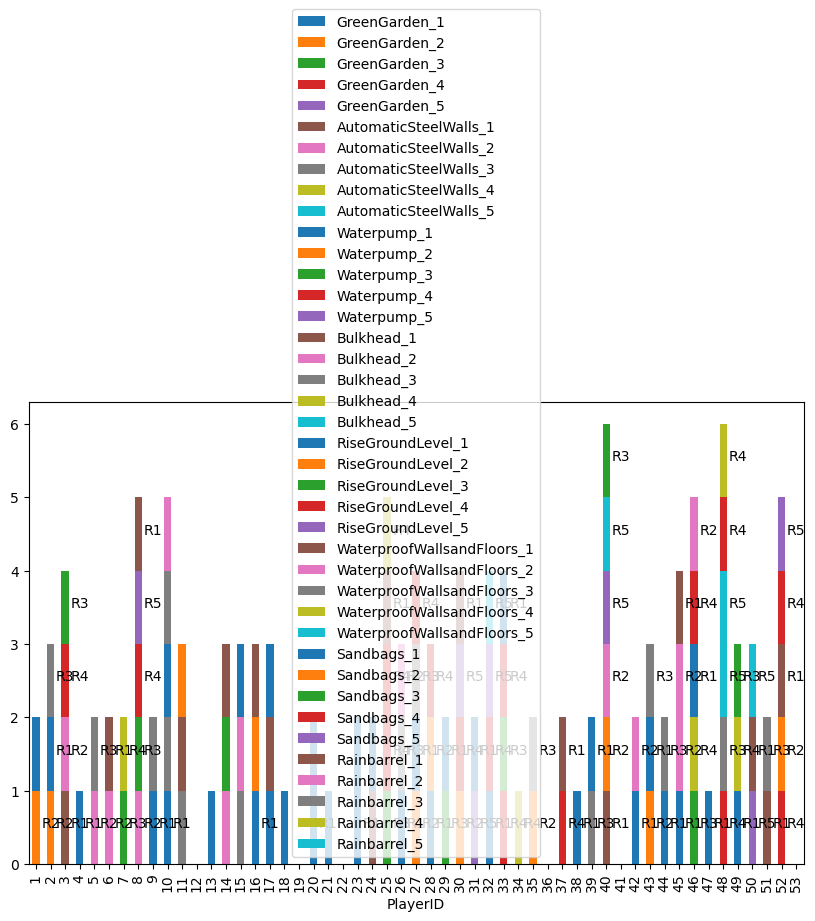

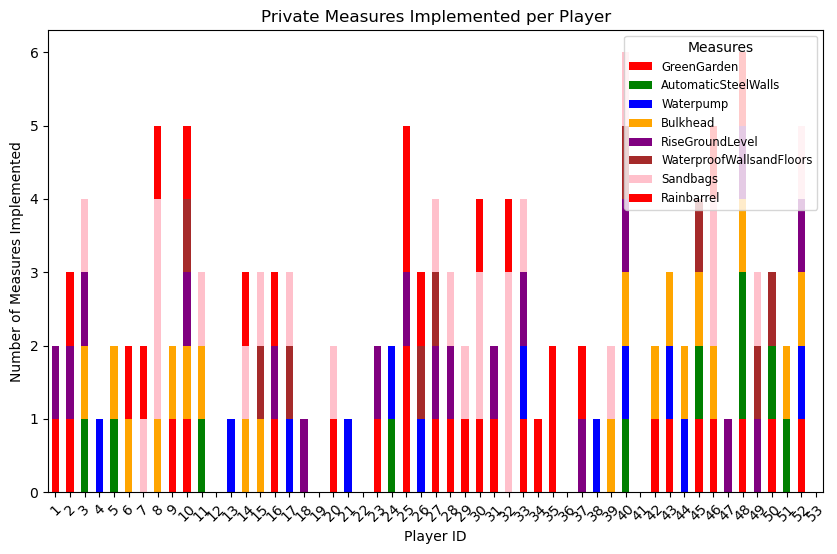

In [39]:

# Define a subset of columns for plotting (private measures implemented)
columns_to_plot = ['GreenGarden', 'AutomaticSteelWalls', 'Waterpump', 'Bulkhead', 
                   'RiseGroundLevel', 'WaterproofWallsandFloors', 'Sandbags', 'Rainbarrel']


# Group by PlayerID and sum the specified columns
grouped_game = private_measures_overall.groupby(['PlayerID', 'Round'])[columns_to_plot].sum().reset_index()

# Pivot the DataFrame to have rounds as columns for each player
pivoted_game = grouped_game.pivot(index='PlayerID', columns='Round', values=columns_to_plot)

# Flatten the MultiIndex columns after pivoting
pivoted_game.columns = ['_'.join(map(str, col)).strip() for col in pivoted_game.columns.values]

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
pivoted_game.plot(kind='bar', stacked=True, ax=ax)

# Annotations
for idx, row in pivoted_game.iterrows():
    cumulative_height = 0
    for col in row.index:
        # Extract round number from column name (assuming format 'Measure_Round')
        round_num = col.split('_')[-1]
        val = row[col]
        if val > 0:  # Only annotate non-zero values
            # Annotate on top of the stacked bar
            ax.text(idx, cumulative_height + val/2, f'R{round_num}', ha='center')
        cumulative_height += val

# Manually define a list of colors for each metric.
# Ensure this list has the same number of colors as the number of metrics you're plotting.
colors_for_metrics = ['red', 'green', 'blue', 'orange', 'purple', 'brown', 'pink']  

# Group the data by 'PlayerID' and sum the specified metric columns
grouped_data = private_measures_overall.groupby('PlayerID')[columns_to_plot].sum()

# Plotting the stacked bar chart with the defined colors for 7 metrics
grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6), color=colors_for_metrics)

plt.title('Private Measures Implemented per Player')
plt.ylabel('Number of Measures Implemented')
plt.xlabel('Player ID')
plt.xticks(rotation=45)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.legend(loc='upper right', fontsize='small', title='Measures')

plt.show()

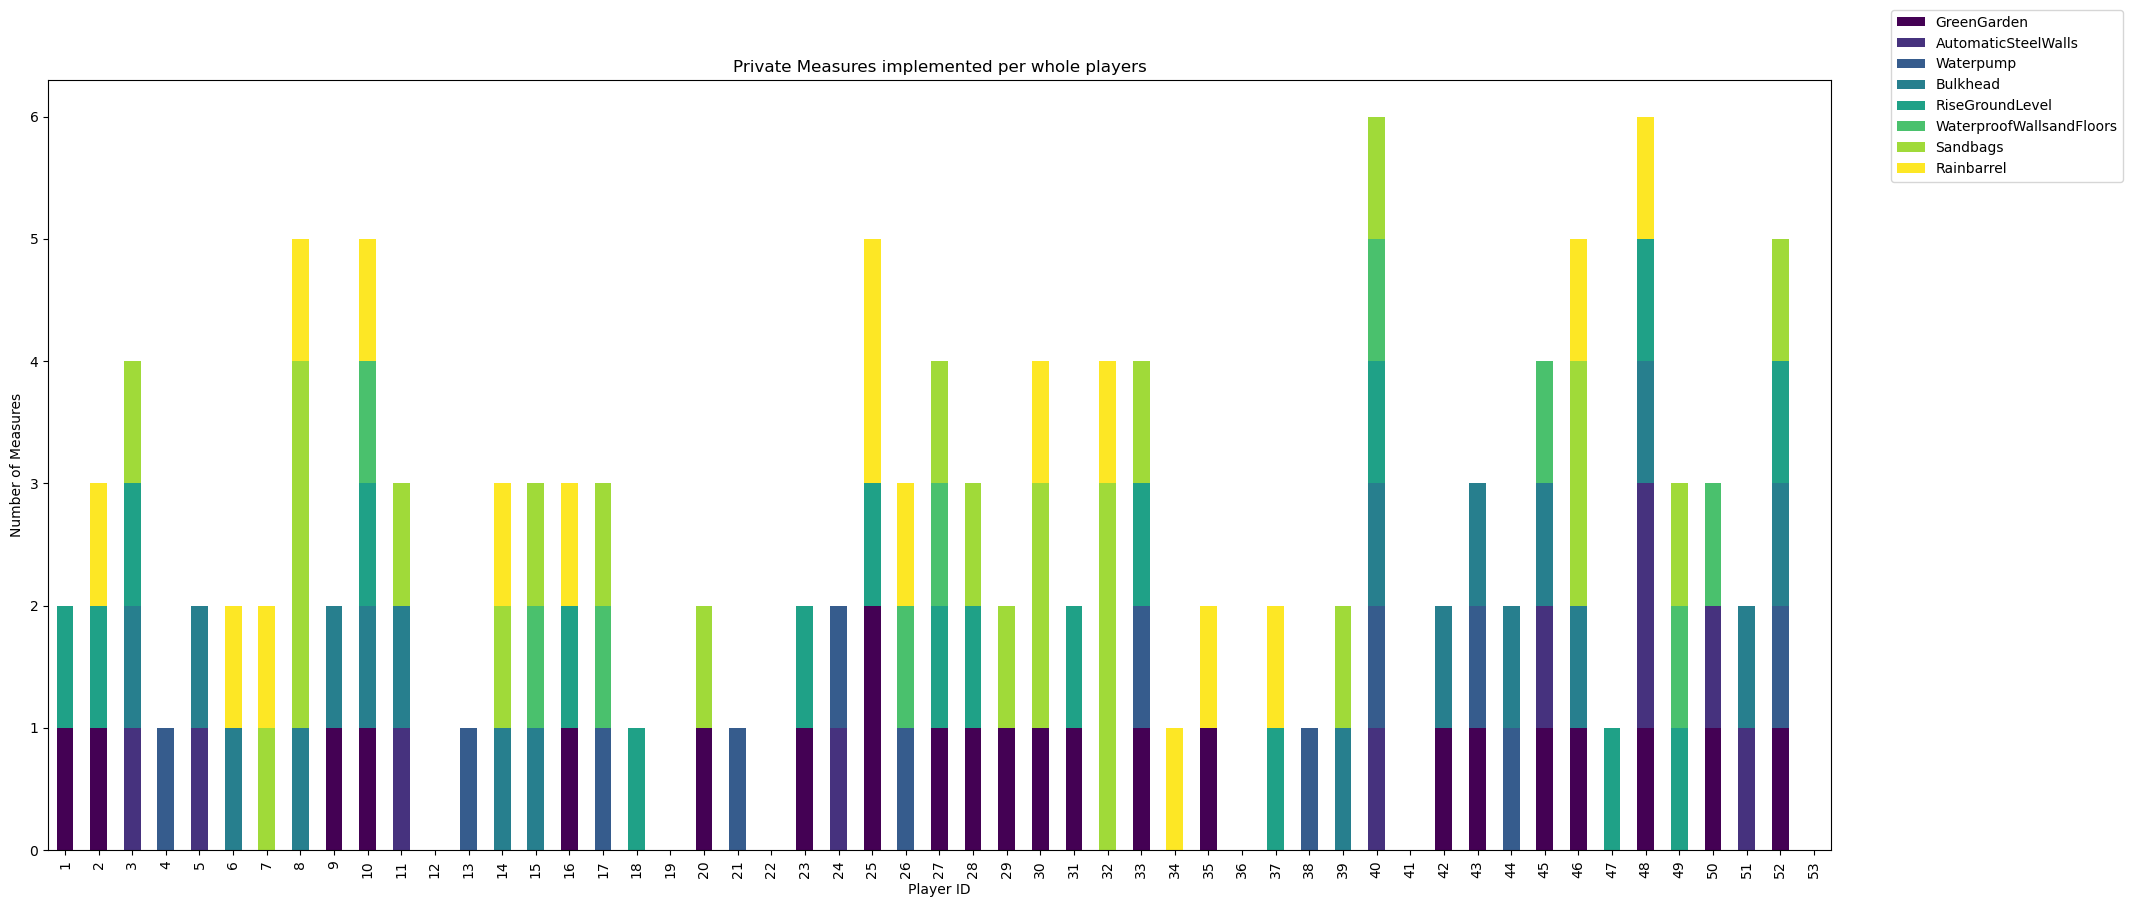

In [34]:
game_overall = private_measures_overall.groupby('PlayerID')[columns_to_replace].sum()

# Plotting the horizontal bar chart
game_overall.plot(kind='bar', stacked=True, figsize=(23, 10), cmap=cmap_overall_chart)

plt.title('Private Measures implemented per whole players')
plt.ylabel('Number of Measures')
plt.xlabel('Player ID')
plt.legend(loc='upper right', bbox_to_anchor=(1.168,1.1))  
plt.show()

### 4- analysing the data based on Latent Classes